In [3]:
import os
#os.chdir('/Users/rupesh.karn/Desktop/WorkPart-1/UNSW-NB15 Dataset')
import pandas as pd
import numpy as np
import csv
import os
import time
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (16.0, 5.0)

# Read in the training CSV file
print("Reading Training csv file.")
df1 = pd.read_csv("/root/pathint/fig_split_mnist/UNSW_NB15_training-set.csv")
df1.drop('label', axis=1, inplace=True)

obj_df=df1

obj_df["proto"] = obj_df["proto"].astype('category')
obj_df["service"] = obj_df["service"].astype('category')
obj_df["state"] = obj_df["state"].astype('category')
obj_df["proto_cat"] = obj_df["proto"].cat.codes
obj_df["service_cat"] = obj_df["service"].cat.codes
obj_df["state_cat"] = obj_df["state"].cat.codes

obj_df["proto"] = obj_df["proto_cat"]
obj_df["service"] = obj_df["service_cat"]
obj_df["state"] = obj_df["state_cat"]

obj_df.drop('proto_cat', axis=1, inplace=True)
obj_df.drop('service_cat', axis=1, inplace=True)
obj_df.drop('state_cat', axis=1, inplace=True)

Y_train_all_attacks = obj_df["attack_cat"]
obj_df=pd.get_dummies(obj_df, columns=["attack_cat"])


X_train = obj_df.values[:,:-10]
Y_train_onehot_encoded = obj_df.values[:,-10:]

for j in range(0,43):
    maximum = max(X_train[:,j])
    for i in range(0,len(X_train)):
        X_train[i,j] = round(X_train[i,j]/maximum,3)

# Read in the testing CSV file 
print("Reading Testing csv file.")
df2 = pd.read_csv("/root/pathint/fig_split_mnist/UNSW_NB15_testing-set.csv")
df2.drop('label', axis=1, inplace=True)

obj_df2=df2

obj_df2["proto"] = obj_df2["proto"].astype('category')
obj_df2["service"] = obj_df2["service"].astype('category')
obj_df2["state"] = obj_df2["state"].astype('category')
obj_df2["proto_cat"] = obj_df2["proto"].cat.codes
obj_df2["service_cat"] = obj_df2["service"].cat.codes
obj_df2["state_cat"] = obj_df2["state"].cat.codes

obj_df2["proto"] = obj_df2["proto_cat"]
obj_df2["service"] = obj_df2["service_cat"]
obj_df2["state"] = obj_df2["state_cat"]

obj_df2.drop('proto_cat', axis=1, inplace=True)
obj_df2.drop('service_cat', axis=1, inplace=True)
obj_df2.drop('state_cat', axis=1, inplace=True)

Y_test_all_attacks = obj_df2["attack_cat"]
obj_df2=pd.get_dummies(obj_df2, columns=["attack_cat"])


X_test = obj_df2.values[:,:-10]
Y_test_onehot_encoded = obj_df2.values[:,-10:]

for j in range(0,43):
    maximum = max(X_train[:,j])
    for i in range(0,len(X_test)):
        X_test[i,j] = round(X_test[i,j]/maximum,3)


estimators_number = list(range(10,30))

dataspace = 0;
overall_accuracy_matrix = [None]*len(X_train)
iTERATION=0
dataspace_number=1
attack_type = 4
Y_train = obj_df.values[:,-attack_type]
Y_test = obj_df2.values[:,-attack_type]

cleanup_nums = {"Worms":0, "Shellcode":1, "Reconnaissance":2, "Normal":3, "Generic":4, "Fuzzers":5, "Exploits":6, "DoS":7, "Backdoor":8, "Analysis":9}
Y_train_all_attacks.replace(cleanup_nums,inplace=True)
Y_test_all_attacks.replace(cleanup_nums,inplace=True)

Reading Training csv file.
Reading Testing csv file.


In [4]:
from keras.utils import np_utils

#task_labels = [[0,1], [2,3], [4,5], [6,7], [8,9],[1,5],[7,9],[3,8],[0,6],[4,2]]
#task_labels = [[4,2], [0,6], [3,8], [9,7], [1,5],[8,9],[6,7],[5,5],[3,2],[0,1]]
#task_labels = [[8,9], [6,7], [4,5], [2,3], [0,1]]
#task_labels = [[0,9], [7,8], [3,6], [1,4], [2,5]]
task_labels = [[0,1], [2,3], [4,5], [6,7], [8,9],[1,5],[7,9]]
#task_labels = [[0,1], [2,3,1,0],[4,5,1,2], [6,7,3,0],[8,9,4,6]]
n_tasks = len(task_labels)
nb_classes  = 10
training_datasets = []
validation_datasets = []
multihead=False

for labels in task_labels:
    idx = np.in1d(Y_train_all_attacks, labels)
    if multihead:
        label_map = np.arange(nb_classes)
        label_map[labels] = np.arange(len(labels))
        data = X_train[idx], np_utils.to_categorical(label_map[Y_train_all_attacks[idx]], len(labels))
    else:
        data = X_train[idx], np_utils.to_categorical(Y_train_all_attacks[idx], nb_classes)
        training_datasets.append(data)

for labels in task_labels:
    idx = np.in1d(Y_test_all_attacks, labels)
    if multihead:
        label_map = np.arange(nb_classes)
        label_map[labels] = np.arange(len(labels))
        data = X_test[idx], np_utils.to_categorical(label_map[Y_test_all_attacks[idx]], len(labels))
    else:
        data = X_test[idx], np_utils.to_categorical(Y_test_all_attacks[idx], nb_classes)
        validation_datasets.append(data)
        
tasks_train={}; labels_train = {}; tasks_test = {}; labels_test = {}

for i in range(len(task_labels)):
    tasks_train[str(i)] = training_datasets[i][0]
    labels_train[str(i)] = training_datasets[i][1]
    tasks_test[str(i)] = validation_datasets[i][0]
    labels_test[str(i)] = validation_datasets[i][1]
    print('Rank of the training task {} is {}'.format(i,np.linalg.matrix_rank(training_datasets[i][0])))
    print('Task {0} size: Trainset - {1}, {2}, Testset - {3}, {4}'.format(i,tasks_train[str(i)].shape, labels_train[str(i)].shape, tasks_test[str(i)].shape, labels_test[str(i)].shape))

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

Rank of the training task 0 is 33
Task 0 size: Trainset - (422, 43), (422, 10), Testset - (1263, 43), (1263, 10)
Rank of the training task 1 is 43
Task 1 size: Trainset - (40496, 43), (40496, 10), Testset - (66491, 43), (66491, 10)
Rank of the training task 2 is 40
Task 2 size: Trainset - (24933, 43), (24933, 10), Testset - (58184, 43), (58184, 10)
Rank of the training task 3 is 41
Task 3 size: Trainset - (15221, 43), (15221, 10), Testset - (45657, 43), (45657, 10)
Rank of the training task 4 is 38
Task 4 size: Trainset - (1260, 43), (1260, 10), Testset - (3746, 43), (3746, 10)
Rank of the training task 5 is 39
Task 5 size: Trainset - (6440, 43), (6440, 10), Testset - (19317, 43), (19317, 10)
Rank of the training task 6 is 40
Task 6 size: Trainset - (4766, 43), (4766, 10), Testset - (14264, 43), (14264, 10)


In [5]:
# -*- coding: utf-8 -*-
import tensorflow as tf
import numpy as np
import datetime
from tensorflow.contrib.learn.python.learn.datasets.mnist import DataSet
from tensorflow.contrib.learn.python.learn.datasets import base
from tensorflow.python.framework import dtypes
from OWMLayer_2Layers import OWMLayer
import os
import pdb
import pprint
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # ignore warning
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # use gpu0,1

# Parameters
# ==================================================
tf.flags.DEFINE_integer("num_checkpoints", 3, "Number of checkpoints to store (default: 5)")
tf.flags.DEFINE_boolean("allow_soft_placement", True, "Allow device soft device placement")
tf.flags.DEFINE_boolean("log_device_placement", False, "Log placement of ops on devices")
tf.app.flags.DEFINE_string("buckets", "", "")
tf.app.flags.DEFINE_string("checkpointDir", "", "oss info")
tf.flags.DEFINE_integer("num_class", 10, "")
tf.flags.DEFINE_integer("batch_size", 64, "Batch Size (default: 64)")
tf.flags.DEFINE_integer("epoch", 50, "")
FLAGS = tf.flags.FLAGS
# ==================================================

In [6]:
import pdb
def next_batch(l, n,m): 
    final = [l[i * n:(i + 1) * n,:] for i in range((len(l) + n - 1) // n )]
    #Repeating the frazme segmentation for different epochs
    if m >= len(final): 
        m = m % len(final)
        if m == 0:
            np.random.shuffle(l)
            final = [l[i * n:(i + 1) * n,:] for i in range((len(l) + n - 1) // n )]
    return(final[m]) 

#Heuristic metric: Weights Pattern after training each task
from math import*
#1. Euclidean distance
def euclidean_distance(x,y):
    return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

#2. Cosine Similarity
def square_rooted(x):
    return round(sqrt(sum([a*a for a in x])),3)
def cosine_similarity(x,y):
    numerator = sum(a*b for a,b in zip(x,y))
    denominator = square_rooted(x)*square_rooted(y)
    return round(numerator/float(denominator),3)

#3. Jaccard similarity
def jaccard_similarity(x,y):
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

#4. Using SequenceMatcher    
from difflib import SequenceMatcher

Training Disjoint UNSW Task 1
Task performs classification between {0, 1}
Shape of P1 = (44, 44). Rank of P1 = 43. Shape of P2 = (101, 101). Rank of P2=101
Number of non-zero in P1 = 1684, in P2=6907
Test on Previous Datasets:
{'Task1': 0.44101346,
 'Task2': 0.0,
 'Task3': 0.0,
 'Task4': 0.000591366,
 'Task5': 0.3582488,
 'Task6': 0.028834704,
 'Task7': 0.094083}
Training Disjoint UNSW Task 2
Task performs classification between {2, 3}
Shape of P1 = (44, 44). Rank of P1 = 43. Shape of P2 = (101, 101). Rank of P2=100
Number of non-zero in P1 = 1936, in P2=9221
Test on Previous Datasets:
{'Task1': 0.8321457,
 'Task2': 0.07225038,
 'Task3': 0.0,
 'Task4': 0.0,
 'Task5': 0.0,
 'Task6': 0.054408036,
 'Task7': 0.0}
Training Disjoint UNSW Task 3
Task performs classification between {4, 5}
Shape of P1 = (44, 44). Rank of P1 = 42. Shape of P2 = (101, 101). Rank of P2=100
Number of non-zero in P1 = 1936, in P2=9413
Test on Previous Datasets:
{'Task1': 0.456057,
 'Task2': 0.74984586,
 'Task3': 0.

SystemExit: 

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


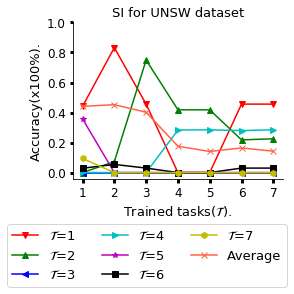

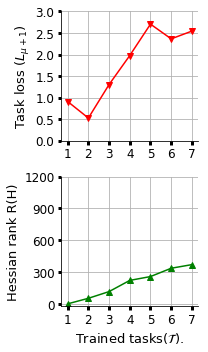

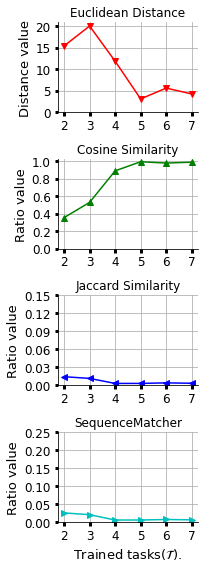

In [8]:
from numpy import count_nonzero
def train(Task_list):
    # Training
    # ==================================================
    g1 = tf.Graph()
    middle = 100
    with g1.as_default():
        OWM = OWMLayer([[43 + 1, middle], [middle + 1, 10]], seed_num=32)

    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    test_array = []
    Gradients = []
    Weights = []
    Tasks_Accuracy = []
    loss_after_task = []
    with tf.Session(graph=g1, config=config) as sess1:
        # Initialize all variables
        init = [tf.global_variables_initializer(), tf.local_variables_initializer()]
        sess1.run(init)
        task_num = 7
        for j in range(0, task_num):
            print("Training Disjoint UNSW Task %d" % (j + 1))
            
            # Update the parameters
            epoch_owm = FLAGS.epoch
            batch_size_owm = FLAGS.batch_size
            #print('Task performs classification between {0} and rest.'.format(set(np.argmax(mnist_list[j].train.labels,axis=1))))
            print('Task performs classification between {0}'.format(set(np.argmax(Task_list[1][str(j)],axis=1))))
            all_data = len(Task_list[1][str(j)][:])
            all_step = all_data*epoch_owm//batch_size_owm
            for current_step in range(all_step):
                lamda = current_step/all_step
                current_step = current_step+1
                batch_xs = next_batch(Task_list[0][str(j)][:], batch_size_owm, current_step)
                batch_ys = next_batch(Task_list[1][str(j)][:], batch_size_owm, current_step)
                feed_dict = {
                    OWM.input_x: batch_xs,
                    OWM.input_y: batch_ys,
                    OWM.lr_array: np.array([[0.02]]),
                    OWM.alpha_array: np.array([[0.9 * 0.001 ** lamda, 0.6]]),
                }
                acc, loss, grads_var, _, = sess1.run([OWM.accuracy, OWM.loss, OWM.grads , OWM.back_forward], feed_dict,)
                '''
                if current_step % (all_step // 2) == 0:
                    print("Train->>>Task: [{:d}/{:d}] Step: {:d}/{:d} Train: loss: {:.2f}, acc: {:.2f}  %"
                          .format(j+1, task_num, current_step*epoch_owm // all_step+1,
                                  epoch_owm, loss, acc * 100))
                if current_step % (all_step // 20) == 0:
                    feed_dict = {
                        OWM.input_x: Task_list[2][str(j)][:],
                        OWM.input_y: Task_list[3][str(j)][:],
                    }
                    acc, loss = sess1.run([OWM.accuracy, OWM.loss], feed_dict)
                    print("Eval->>> Task: [{:d}/{:d}] Step: [{:d}/{:d}] acc: {:g}  %"
                          .format(j+1, task_num, current_step*epoch_owm // all_step+1, epoch_owm, acc * 100))
                '''
            print('Shape of P1 = {}. Rank of P1 = {}. Shape of P2 = {}. Rank of P2={}'.format(sess1.run(OWM.P1, feed_dict,).shape, np.linalg.matrix_rank(sess1.run(OWM.P1, feed_dict,)), sess1.run(OWM.P2, feed_dict,).shape, np.linalg.matrix_rank(sess1.run(OWM.P2, feed_dict,))))
            print('Number of non-zero in P1 = {}, in P2={}'.format(count_nonzero(sess1.run(OWM.P1, feed_dict,)), count_nonzero(sess1.run(OWM.P2, feed_dict,))))
            loss_after_task.append(loss)
            Gradients.append([grads_var[0][0], grads_var[0][1]])
            Weights.append([grads_var[1][0], grads_var[1][1]])
            print("Test on Previous Datasets:")
            correct = []
            Per_task_acc_holder = {}
            for i_test in range(task_num):
                feed_dict = {
                    OWM.input_x: Task_list[2][str(i_test)][:],
                    OWM.input_y: Task_list[3][str(i_test)][:],
                }
                accu, = sess1.run([OWM.accuracy], feed_dict)
                Per_task_acc_holder['Task' + str(i_test+1)] = accu
                correct.append(accu)
            pprint.pprint(Per_task_acc_holder)
            Tasks_Accuracy.append(correct)
            test_accu = np.mean(correct)
            test_array.append(test_accu)
            #print("Aggregate Test Accuracy:->>>[{:d}/{:d}], acc: {:.2f} %".format(j + 1, task_num, test_accu))
        feed_dict = {
            OWM.input_x: X_test,
            OWM.input_y: Y_test_onehot_encoded,
        }
        accu, loss = sess1.run([OWM.accuracy, OWM.loss], feed_dict)
        #print("accu_owm {:g} %\n".format(accu * 100))
        #print('Aggregate test accuracy of trained tasks after completing each task trainng: {}'.format(test_array))
        return(Gradients,Weights, Tasks_Accuracy, loss_after_task)

def main(_):
    # Create 10 disjoint MNIST datasets
    Task_list = [tasks_train, labels_train, tasks_test, labels_test]
    Gradients, Weights, Tasks_Accuracy,loss_after_task = train(Task_list)
    print('Tasks_Accuracy = {}, loss_after_task = {}'.format(Tasks_Accuracy, loss_after_task))
    
    import pdb
    import seaborn as sns
    figure(figsize=(4, 4.5))
    axs = [subplot(1,1,1)]#, None, None]
    fontsize = 13
    average_acc=[]
    for i in range(len(Tasks_Accuracy)):
        average_acc.append(np.mean(Tasks_Accuracy[i][:i+1]))
         
    print('Average accuracy = ',average_acc)
    colorVal = ['r','g','b','c','m','k','y','tomato']
    marker=["v","^","<",">","*","s","h","x","."]
    n_tasks = 7
    mean_vals = np.array(Tasks_Accuracy)
    for j in range(n_tasks):
        label = "$\mathcal{T}$=%g"%(j+1)
        axs[0].plot(range(1,n_tasks+1), mean_vals[:, j], marker=marker[j], c=colorVal[j], label=label)
    axs[0].plot(range(1,n_tasks+1), average_acc, marker=marker[j+1], c=colorVal[j+1], label='Average')
    axs[0].legend(loc='upper right',prop={'size': fontsize}, bbox_to_anchor=(1.05, -0.25), ncol=3)
    axs[0].set_xlabel("Trained tasks($\mathcal{T}$).",fontsize=fontsize)
    axs[0].set_ylabel('Accuracy(x100%).',fontsize=fontsize)
    axs[0].set_xticks(range(1,n_tasks+1))
    axs[0].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    axs[0].tick_params(labelsize='large', width=3)
    axs[0].set_title('SI for UNSW dataset', fontsize=fontsize)
    #plt.legend(bbox_to_anchor=(0.78, 0.66),bbox_transform=plt.gcf().transFigure)
    gcf().tight_layout()
    sns.despine()
    plt.savefig('UNSW_OWM.pdf',bbox_inches = "tight")
    
    def flatten(x):
        try:
            it = iter(x)
        except TypeError:
            yield x
        else:
            for i in it:
                for j in flatten(i):
                    yield j
    Flatten_weights=[]
    for i in range(len(Gradients)):
        Flatten_weights.append(list(flatten(Gradients[i]))) 
    '''
    #Creating the Hessian matrix from the gradients
    import math
    Hessian_matrix = []
    Hessian_row = []
    Rank_Hessian_matrix = []
    for k in range(len(Flatten_weights)):
        for i in range(len(Flatten_weights[k])):
            partial_deriv_1 = (math.ceil(Flatten_weights[k][i]*1e10)/1e10)
            for j in range(len(Flatten_weights[k])):
                partial_deriv_2 = (math.ceil(Flatten_weights[k][j]*1e10)/1e10)
                Hessian_row.append(np.around(partial_deriv_1*partial_deriv_2))
            Hessian_matrix.append(Hessian_row)
            Hessian_row = []
        rank_Hessian_matrix = np.linalg.matrix_rank(np.asarray(Hessian_matrix))
        Rank_Hessian_matrix.append(rank_Hessian_matrix)
        print('Rank of the Hessian Matrix after task=',k,'is :',rank_Hessian_matrix)  
    '''
    Rank_Hessian_matrix = [5,57, 120, 225, 261, 339, 373]  #Calculated by uncommenting above code and then coped here
    figure(figsize=(3, 5))
    axs = [subplot(2,1,1)]#, None, None]
    for i in range(1, 2):
        axs.append(subplot(2, 1, i+1, sharex=axs[0]))
    fontsize = 13

    colorVal = ['r','g','b','c','m','k','y']
    marker=["v","^","<",">","*","s"]

    plots = [loss_after_task,Rank_Hessian_matrix]
    ylabel = ['Task loss ($L_{\mu+1}$)', 'Hessian rank R(H)']
    ytick = [[0,0.5,1.0,1.5,2.0,2.5,3.0], [0,300,600,900, 1200]]
    title = ['Loss', 'Hessian rank']
    for i in range(2):
        axs[i].plot(range(1,n_tasks+1), plots[i], marker=marker[i], c=colorVal[i])
        axs[i].set_ylabel(ylabel[i],fontsize=fontsize)
        axs[i].set_yticks(ytick[i])
        axs[i].tick_params(labelsize='large', width=3)
        axs[i].grid()
    axs[-1].set_xticks(range(1,n_tasks+1))
    axs[-1].set_xlabel("Trained tasks($\mathcal{T}$).",fontsize=fontsize)
    plt.tight_layout()
    sns.despine()
    plt.savefig('UNSW_OWM_evalcongestion.pdf',bbox_inches = "tight")
    
    
    model_weights_save=[]
    for i in range(len(Weights)):
        model_weights_save.append(list(flatten(Weights[i])))
        
    #print("--------------Euclidean distance--------------------")
    Eu_distance = []
    for i in range(1,n_tasks):
        eu_dist = euclidean_distance(list(flatten(model_weights_save[i-1])),list(flatten(model_weights_save[i])))
        Eu_distance.append(eu_dist)
        #print("Between task {0} and {1} : {2}".format(i-1,i,eu_dist))

    #print("--------------Cosine distance--------------------")
    Cos_distance = []
    for i in range(1,n_tasks):
        cos_dist = cosine_similarity(list(flatten(model_weights_save[i-1])),list(flatten(model_weights_save[i])))
        Cos_distance.append(cos_dist)
        #print("Between task {0} and {1} : {2}".format(i-1,i,cos_dist))


    #print("--------------Jaccard similarity--------------------")
    Jac_distance = []
    for i in range(1,n_tasks):
        jac_dist = jaccard_similarity(list(flatten(model_weights_save[i-1])),list(flatten(model_weights_save[i])))
        Jac_distance.append(jac_dist)
        #print("Between task {0} and {1} : {2}".format(i-1,i,jac_dist))

    #print("--------------Sequence Matcher--------------------")
    Seq_matcher = []
    for i in range(1,n_tasks):
        seq_matcher = SequenceMatcher(None,list(flatten(model_weights_save[i-1])),list(flatten(model_weights_save[i]))).ratio()
        Seq_matcher.append(seq_matcher)
        #print("Between task {0} and {1} : {2}".format(i-1,i,seq_matcher))
    figure(figsize=(3, 8))
    subplots_adjust(hspace=0.25,
                        wspace=0.35)
    axs = [plt.subplot(4,1,1)]#, None, None]
    for i in range(1, 4):
        axs.append(subplot(4, 1, i+1, sharex=axs[0]))
    fontsize = 13
    colorVal = ['r','g','b','c','m','k','y']
    marker=["v","^","<",">","*","s"]
    plots = [Eu_distance,Cos_distance,Jac_distance,Seq_matcher]
    ylabel = ['Distance value', 'Ratio value', 'Ratio value','Ratio value']
    ytick = [[0, 5, 10, 15, 20], [0,0.2,0.4,0.6,0.8,1],[0, 0.03, 0.06, 0.09, 0.12, 0.15], [0, 0.05, 0.1, 0.15, 0.2, 0.25]]
    title = ['Euclidean Distance', 'Cosine Similarity', 'Jaccard Similarity', 'SequenceMatcher']
    for i in range(4):
        axs[i].plot(range(2,n_tasks+1), plots[i], marker=marker[i], c=colorVal[i])
        axs[i].set_ylabel(ylabel[i],fontsize=fontsize)
        axs[i].set_yticks(ytick[i])
        axs[i].tick_params(labelsize='large', width=3)
        axs[i].grid()
        axs[i].set_title(title[i])
    axs[-1].set_xticks(range(2,n_tasks+1))
    axs[-1].set_xlabel("Trained tasks($\mathcal{T}$).",fontsize=fontsize)
    plt.tight_layout()
    sns.despine()
    plt.savefig('UNSW_OWM_Similaritymetric.pdf',bbox_inches = "tight")
    
    #Heuristic metric: Weights Pattern between task 0 and last task 
    n_tasks = len(model_weights_save)
    eu_dist = euclidean_distance(list(flatten(model_weights_save[0])),list(flatten(model_weights_save[-1])))
    print("Euclidean distance between task {0} and {1} : {2}".format(0,len(model_weights_save)-1,eu_dist))

    cos_dist = cosine_similarity(list(flatten(model_weights_save[0])),list(flatten(model_weights_save[-1])))
    print("Cosine angle between task {0} and {1} : {2}".format(0,len(model_weights_save)-1,cos_dist))

    jac_dist = jaccard_similarity(list(flatten(model_weights_save[0])),list(flatten(model_weights_save[-1])))
    print("Jaccard similarity between task {0} and {1} : {2}".format(0,len(model_weights_save)-1,jac_dist))

    seq_matcher = SequenceMatcher(None,list(flatten(model_weights_save[0])),list(flatten(model_weights_save[-1]))).ratio()
    print("Sequence angle between task {0} and {1} : {2}".format(0,len(model_weights_save)-1,seq_matcher))
        
if __name__ == '__main__':
    tf.app.run()
